<a href="https://colab.research.google.com/github/Statistically-Inclined/Complete-ML/blob/main/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [27]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

Load MNIST Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


### Reshaping the dataset

In [4]:
X_train = X_train.reshape((60000,28,28,1))
X_test = X_test.reshape((10000,28,28,1))

In [5]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


### Normalization

In [6]:
X_train = X_train/255
X_test = X_test/255

### CNN Model

In [24]:
# defining model
model=Sequential()

# adding convolution layer
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))

# adding pooling layer
model.add(MaxPool2D(2,2))

# adding fully connected layer
model.add(Flatten())
model.add(Dense(100, activation='relu'))

# adding output layer
model.add(Dense(10,activation='softmax'))

# compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
# summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               540900    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

In [32]:
# compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
# Save the best weights
model_checkpoint = ModelCheckpoint(filepath="MNIST_Model.h5", verbose=1, save_best_only=True)

In [34]:
# Early stoppings
callbacks = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [35]:
history = model.fit(X_train, y_train, validation_split=0.1, batch_size=100, epochs=30, callbacks=[callbacks, model_checkpoint]) 

Epoch 1/30
540/540 [==============================] - ETA: 0s - loss: 0.2164 - accuracy: 0.9380
Epoch 1: val_loss improved from inf to 0.07757, saving model to MNIST_Model.h5
540/540 [==============================] - 25s 45ms/step - loss: 0.2164 - accuracy: 0.9380 - val_loss: 0.0776 - val_accuracy: 0.9788
Epoch 2/30
540/540 [==============================] - ETA: 0s - loss: 0.0705 - accuracy: 0.9790
Epoch 2: val_loss improved from 0.07757 to 0.05983, saving model to MNIST_Model.h5
540/540 [==============================] - 29s 54ms/step - loss: 0.0705 - accuracy: 0.9790 - val_loss: 0.0598 - val_accuracy: 0.9842
Epoch 3/30
539/540 [============================>.] - ETA: 0s - loss: 0.0476 - accuracy: 0.9854
Epoch 3: val_loss improved from 0.05983 to 0.05863, saving model to MNIST_Model.h5
540/540 [==============================] - 26s 48ms/step - loss: 0.0477 - accuracy: 0.9854 - val_loss: 0.0586 - val_accuracy: 0.9833
Epoch 4/30
540/540 [==============================] - ETA: 0s - loss

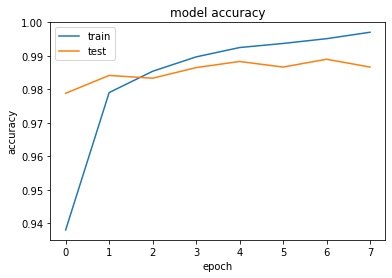

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

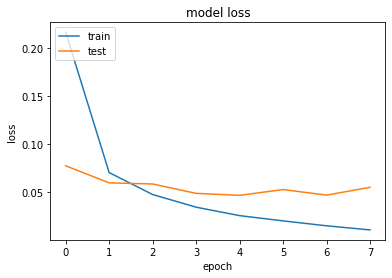

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
model = load_model('MNIST_Model.h5')

In [38]:
y_test_pred = model.predict(X_test)

In [39]:
y_test_pred

array([[1.1255697e-10, 1.1478385e-08, 3.7500463e-08, ..., 9.9999869e-01,
        1.7815513e-08, 7.0793611e-09],
       [1.8216784e-06, 4.2778640e-05, 9.9994028e-01, ..., 2.0089457e-08,
        5.3274323e-07, 1.8925601e-09],
       [4.9056769e-05, 9.9929798e-01, 1.4899999e-05, ..., 1.6826260e-04,
        2.6486348e-04, 1.6015906e-06],
       ...,
       [1.2033381e-12, 2.9155134e-09, 5.2480511e-12, ..., 6.2805839e-07,
        1.2986484e-06, 5.5085491e-07],
       [1.4678596e-08, 1.5524328e-10, 1.3892050e-10, ..., 1.6016557e-08,
        3.9873354e-04, 4.3166665e-08],
       [4.0049550e-09, 2.3472663e-13, 9.6436792e-10, ..., 1.8549758e-12,
        1.2397973e-07, 9.4421120e-12]], dtype=float32)

In [40]:
y_test_pred = np.argmax(y_test_pred, axis=1)
y_test_pred

array([7, 2, 1, ..., 4, 5, 6])

In [41]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [42]:
print(y_test.shape, y_test_pred.shape)

(10000,) (10000,)


In [43]:
# evaluting the model
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Test Loss: 0.04360981285572052
Test Accuracy: 0.9857000112533569


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

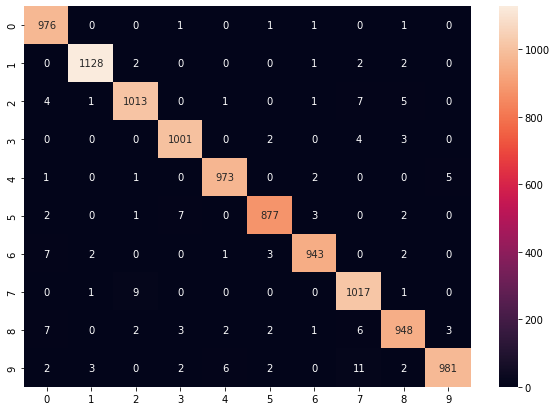

In [45]:
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g')

In [46]:
accuracy = accuracy_score(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)
print('accuracy:', accuracy)
print('\nclassification report:\n', class_report)

accuracy: 0.9857

classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

